<a href="https://colab.research.google.com/github/Elekcktra/credit-risk-model/blob/main/APS360_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("rameshmehta/credit-risk-analysis")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/credit-risk-analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

data_file = 'data.csv'
df = pd.read_csv(f'{path}/{data_file}')

print("="*60)
print("INITIAL DATA")
print("="*60)

# Basic dataset information
print(f"Dataset shape: {df.shape}")

# Basic statistics
print(f"\nDataset Info:")
print(f"  - Total records: {len(df):,}")
print(f"  - Total features: {df.shape[1]}")
print(f"  - Numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"  - Categorical features: {len(df.select_dtypes(include=['object']).columns)}")

# Check for missing values
print("\nMissing Value Analysis:")
missing_stats = df.isnull().sum()
missing_percent = (missing_stats / len(df)) * 100
missing_df = pd.DataFrame({
    'Feature': missing_stats.index,
    'Missing_Count': missing_stats.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Percentage', ascending=False)

# Display features with missing values
features_with_missing = missing_df[missing_df['Missing_Count'] > 0]
if len(features_with_missing) > 0:
    print(f"Features with missing values: {len(features_with_missing)}")
    print(features_with_missing.head)

INITIAL DATA
Dataset shape: (855969, 73)

Dataset Info:
  - Total records: 855,969
  - Total features: 73
  - Numerical features: 52
  - Categorical features: 21

Missing Value Analysis:
Features with missing values: 32
<bound method NDFrame.head of                         Feature  Missing_Count  Missing_Percentage
53    verification_status_joint         855527           99.948363
52                    dti_joint         855527           99.948363
51             annual_inc_joint         855527           99.948363
63                      il_util         844360           98.643759
61           mths_since_rcnt_il         843035           98.488964
66                   max_bal_bc         842681           98.447607
57                  open_acc_6m         842681           98.447607
65                  open_rv_24m         842681           98.447607
71                 inq_last_12m         842681           98.447607
70                  total_cu_tl         842681           98.447607
69           

***
More than 98% Missing
***

verification_status_joint: Remove

dti_joint: Remove

annual_inc_joint: Remove

il_util: Remove

mths_since_rcnt_il: Remove

max_bal_bc: Remove

open_acc_6m: Remove

open_rv_24m: Remove

inq_last_12m: Remove

total_cu_tl: Remove

inq_fi: Remove

all_util: Remove

open_il_6m: Remove

open_il_24m: Remove

open_il_12m: Remove

total_bal_il: Remove

open_rv_12m: Remove

desc: Remove

***
Does Not Exist
***

mths_since_last_record: High Number

mths_since_last_major_derog: High Number

mths_since_last_delinq: High Number

last_credit_pull_d = High Number

***
Other
***

next_pymnt_d: Remove (Not Relevant)

tot_cur_bal: mean

tot_coll_amt: Remove (Data Leak)

total_rev_hi_lim: New missing category (Null values were significant)

emp_title: Remove (High Variation)

emp_length: Mode

last_pymnt_d: Remove (Data Leak)

revol_util: New missing category (Null values were significant)

collections_12_mths_ex_med: Remove (Data Leak)

title: Remove (similar to 'purpose')

In [ ]:
df.groupby(df['total_rev_hi_lim'].isnull())['default_ind'].mean() # Check if null values are significant

,default_ind
total_rev_hi_lim,
False,0.046193
True,0.149109


In [ ]:
print("\n" + "="*60)
print("FEATURE CLEANING")
print("="*60)

features_to_remove = []

# Remove description and missing value columns
id_patterns = ['id', 'member_id', 'emp_title', 'desc', 'zip_code', 'addr_state', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'next_pymnt_d',
               'il_util', 'mths_since_rcnt_il', 'max_bal_bc', 'open_acc_6m', 'open_rv_24m', 'inq_last_12m', 'total_cu_tl', 'inq_fi', 'all_util', 'open_il_6m',
               'open_il_24m', 'open_il_12m', 'total_bal_il', 'open_rv_12m', 'title', 'initial_list_status', 'policy_code', 'last_pymnt_d', 'last_credit_pull_d',
               'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'recoveries', 'collection_recovery_fee',
               'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'out_prncp', 'out_prncp_inv', 'tot_cur_bal', 'mths_since_last_delinq',
               'mths_since_last_major_derog', 'mths_since_last_record', 'funded_amnt', 'funded_amnt_inv', 'installment']

for col in id_patterns:
    features_to_remove.append(col)

print(f"Features to remove ({len(features_to_remove)}):")
for feature in features_to_remove:
    print(f"  - {feature}")

# Remove features
df_clean = df.drop(columns=features_to_remove, errors='ignore')

# Fill missing values
# Mode
df_clean['emp_length'].fillna(df_clean['emp_length'].mode()[0], inplace=True)

# Create missing flag + fill with 0
df_clean['total_rev_hi_lim_missing'] = df_clean['total_rev_hi_lim'].isnull().astype(int)
df_clean['total_rev_hi_lim'].fillna(df_clean['total_rev_hi_lim'].median(), inplace=True)
df_clean['revol_util_missing'] = df_clean['revol_util'].isnull().astype(int)
df_clean['revol_util'].fillna(df_clean['revol_util'].median(), inplace=True)

print(f"\nData Shape: {df_clean.shape}")


FEATURE CLEANING
Features to remove (49):
  - id
  - member_id
  - emp_title
  - desc
  - zip_code
  - addr_state
  - verification_status_joint
  - dti_joint
  - annual_inc_joint
  - next_pymnt_d
  - il_util
  - mths_since_rcnt_il
  - max_bal_bc
  - open_acc_6m
  - open_rv_24m
  - inq_last_12m
  - total_cu_tl
  - inq_fi
  - all_util
  - open_il_6m
  - open_il_24m
  - open_il_12m
  - total_bal_il
  - open_rv_12m
  - title
  - initial_list_status
  - policy_code
  - last_pymnt_d
  - last_credit_pull_d
  - total_pymnt
  - total_pymnt_inv
  - total_rec_prncp
  - total_rec_int
  - total_rec_late_fee
  - last_pymnt_amnt
  - recoveries
  - collection_recovery_fee
  - collections_12_mths_ex_med
  - acc_now_delinq
  - tot_coll_amt
  - out_prncp
  - out_prncp_inv
  - tot_cur_bal
  - mths_since_last_delinq
  - mths_since_last_major_derog
  - mths_since_last_record
  - funded_amnt
  - funded_amnt_inv
  - installment

Data Shape: (855969, 26)


In [ ]:
from sklearn.preprocessing import PowerTransformer

# Ordinal Mapping
emp_length_order = {
    'n/a': 0,
    '< 1 year': 1,
    '1 year': 2,
    '2 years': 3,
    '3 years': 4,
    '4 years': 5,
    '5 years': 6,
    '6 years': 7,
    '7 years': 8,
    '8 years': 9,
    '9 years': 10,
    '10+ years': 11
}
emp_length_mode = df_clean['emp_length'].mode()[0]

grade_mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6
}
sub_grades = [f"{g}{n}" for g in "ABCDEFG" for n in range(1, 6)]
sub_grade_mapping = {sub: idx for idx, sub in enumerate(sub_grades)}

df_clean['emp_length'] = df_clean['emp_length'].map(emp_length_order).fillna(emp_length_mode)
df_clean['grade'] = df_clean['grade'].map(grade_mapping)
df_clean['sub_grade'] = df_clean['sub_grade'].map(sub_grade_mapping)

categorical_cols = [
    'term', 'home_ownership', 'verification_status',
    'pymnt_plan', 'purpose', 'application_type'
]

date_cols = [
    'issue_d', 'earliest_cr_line']

# Convert date columns

for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

reference_date = pd.Timestamp('2007-01-01')
for col in date_cols:
    df_clean[f'{col}_year'] = df_clean[col].dt.year.fillna(2007).astype(int)
    df_clean[f'{col}_month'] = df_clean[col].dt.month.fillna(1).astype(int)
    df_clean[f'{col}_days_since'] = (reference_date - df_clean[col]).dt.days.fillna(9999).astype(int)
df_clean.drop(columns=date_cols, inplace=True)

# Normalize numerical features
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'default_ind' in numerical_cols:
    numerical_cols.remove('default_ind')

constant_features = []
for col in numerical_cols:
    if df_clean[col].nunique() <= 1:
        constant_features.append(col)
numerical_cols = [col for col in numerical_cols if col not in constant_features]

# Apply PowerTransformer to remaining features
try:
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    df_clean[numerical_cols] = pt.fit_transform(df_clean[numerical_cols])
except Exception as e:
    scaler = StandardScaler()
    df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])


# One-hot encode the updated categorical columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

print("="*60)
print("DATASET STATS AFTER CLEANING")
print("="*60)

print(f"Shape after cleaning: {df_clean.shape}")
print(f"Number of numerical features: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"Number of categorical features: {len(df_clean.select_dtypes(include=['uint8', 'category']).columns)}")

print("\nMissing values per feature after cleaning:")
missing_after = df_clean.isnull().sum()
missing_after = missing_after[missing_after > 0]
if missing_after.empty:
    print("None")
else:
    print(missing_after)

DATASET STATS AFTER CLEANING
Shape after cleaning: (855969, 47)
Number of numerical features: 47
Number of categorical features: 0

Missing values per feature after cleaning:
None


In [ ]:
# Random undersampling majority class
X = df_clean.drop(columns=['default_ind'])
y = df_clean['default_ind']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS - BEFORE UNDERSAMPLING")
print("="*60)

target_col = 'default_ind'

if target_col:
    target_distribution = y.value_counts()
    print(f"Target distribution:")
    for value, count in target_distribution.items():
        print(f"  {value}: {count:,} ({count/len(y)*100:.2f}%)")

print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS - AFTER UNDERSAMPLING")
print("="*60)

if target_col:
    resampled_distribution = pd.Series(y_resampled).value_counts()
    total_resampled = len(y_resampled)
    print(f"Target distribution:")
    for value, count in resampled_distribution.items():
        print(f"  {value}: {count:,} ({count/total_resampled*100:.2f}%)")



TARGET VARIABLE ANALYSIS - BEFORE UNDERSAMPLING
Target distribution:
  0: 809,502 (94.57%)
  1: 46,467 (5.43%)

TARGET VARIABLE ANALYSIS - AFTER UNDERSAMPLING
Target distribution:
  0: 46,467 (50.00%)
  1: 46,467 (50.00%)


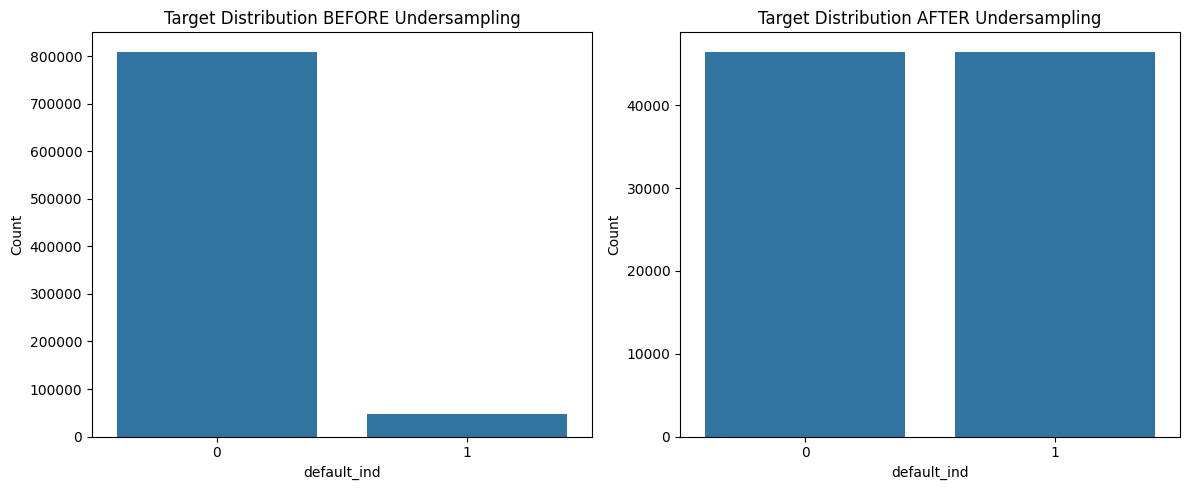

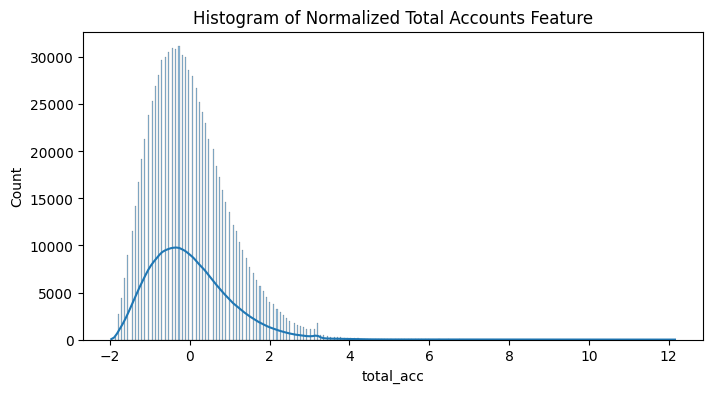

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before and after undersampling
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before undersampling
sns.countplot(x=y, ax=axs[0])
axs[0].set_title("Target Distribution BEFORE Undersampling")
axs[0].set_xlabel("default_ind")
axs[0].set_ylabel("Count")

# After undersampling
sns.countplot(x=y_resampled, ax=axs[1])
axs[1].set_title("Target Distribution AFTER Undersampling")
axs[1].set_xlabel("default_ind")
axs[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Plot example of normalization
plt.figure(figsize=(8,4))
sns.histplot(df_clean['total_acc'], kde=True)
plt.title("Histogram of Normalized Total Accounts Feature")
plt.show()


In [ ]:
import pandas as pd

print("\n" + "="*60)
print("CLEANED DATA SAMPLE")
print("="*60)

with pd.option_context('display.max_columns', None):
    print(df_clean.drop(columns=['default_ind']).head())


CLEANED DATA SAMPLE
   loan_amnt  int_rate     grade  sub_grade  emp_length  annual_inc       dti  \
0  -1.156698 -0.581985 -0.596218  -0.752646    1.028757   -0.794704  0.546834   
1  -1.453422  0.475620  0.170277   0.332167   -1.692526   -0.701340 -0.982699   
2  -1.465291  0.633574  0.170277   0.487140    1.028757   -0.977511 -0.539622   
3  -0.563250  0.068145  0.170277  -0.132753    1.028757   -0.402574  0.107775   
4  -1.394078 -0.114990 -0.596218  -0.287726   -1.420398    0.076696 -0.010455   

   delinq_2yrs  inq_last_6mths  open_acc   pub_rec  revol_bal  revol_util  \
0    -0.363538        0.330990 -1.609326 -0.334495  -0.146804    1.204776   
1    -0.363538        4.480228 -1.609326 -0.334495  -0.685012   -1.916368   
2    -0.363538        1.368299 -1.797718 -0.334495  -0.627911    1.826484   
3    -0.363538        0.330990 -0.290584 -0.334495  -0.509029   -1.429083   
4    -0.363538       -0.706319  0.651374 -0.334495   0.489228   -0.047042   

   total_acc  total_rev_hi_li

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled,
    test_size=0.30,
    random_state=42,
    stratify=y_resampled
)

# Split temp into 50% validation, 50% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print(f"Train class distribution:\n{y_train.value_counts(normalize=False)}")
print(f"\nValidation class distribution:\n{y_val.value_counts(normalize=False)}")
print(f"\nTest class distribution:\n{y_test.value_counts(normalize=False)}")

Train class distribution:
default_ind
1    32527
0    32526
Name: count, dtype: int64

Validation class distribution:
default_ind
1    6970
0    6970
Name: count, dtype: int64

Test class distribution:
default_ind
0    6971
1    6970
Name: count, dtype: int64


In [ ]:
df_resampled = X_resampled.copy()
df_resampled['default_ind'] = y_resampled

df_train, df_temp = train_test_split(
    df_resampled,
    test_size=0.30,
    stratify=df_resampled['default_ind'],
    random_state=42
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp['default_ind'],
    random_state=42
)

# Save to CSV files
df_train.to_csv('train_cleaned.csv', index=False)
df_val.to_csv('val_cleaned.csv', index=False)
df_test.to_csv('test_cleaned.csv', index=False)

In [ ]:
for col in df_clean.columns:
    print(col)

loan_amnt
int_rate
grade
sub_grade
emp_length
annual_inc
dti
delinq_2yrs
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
total_rev_hi_lim
default_ind
total_rev_hi_lim_missing
revol_util_missing
issue_d_year
issue_d_month
issue_d_days_since
earliest_cr_line_year
earliest_cr_line_month
earliest_cr_line_days_since
term_ 60 months
home_ownership_MORTGAGE
home_ownership_NONE
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
verification_status_Source Verified
verification_status_Verified
pymnt_plan_y
purpose_credit_card
purpose_debt_consolidation
purpose_educational
purpose_home_improvement
purpose_house
purpose_major_purchase
purpose_medical
purpose_moving
purpose_other
purpose_renewable_energy
purpose_small_business
purpose_vacation
purpose_wedding
application_type_JOINT


Training AUC-ROC Score: 0.8128
Training Classification Report
              precision    recall  f1-score   support

           0   0.739690  0.735596  0.737637     32526
           1   0.737059  0.741138  0.739093     32527

    accuracy                       0.738367     65053
   macro avg   0.738374  0.738367  0.738365     65053
weighted avg   0.738374  0.738367  0.738365     65053


Validation AUC-ROC Score: 0.8167
Validation Classification Report
              precision    recall  f1-score   support

           0   0.740603  0.740603  0.740603      6970
           1   0.740603  0.740603  0.740603      6970

    accuracy                       0.740603     13940
   macro avg   0.740603  0.740603  0.740603     13940
weighted avg   0.740603  0.740603  0.740603     13940


Testing AUC-ROC Score: 0.8120
Testing Classification Report
              precision    recall  f1-score   support

           0   0.740344  0.734184  0.737252      6971
           1   0.736340  0.742468  0.739391    

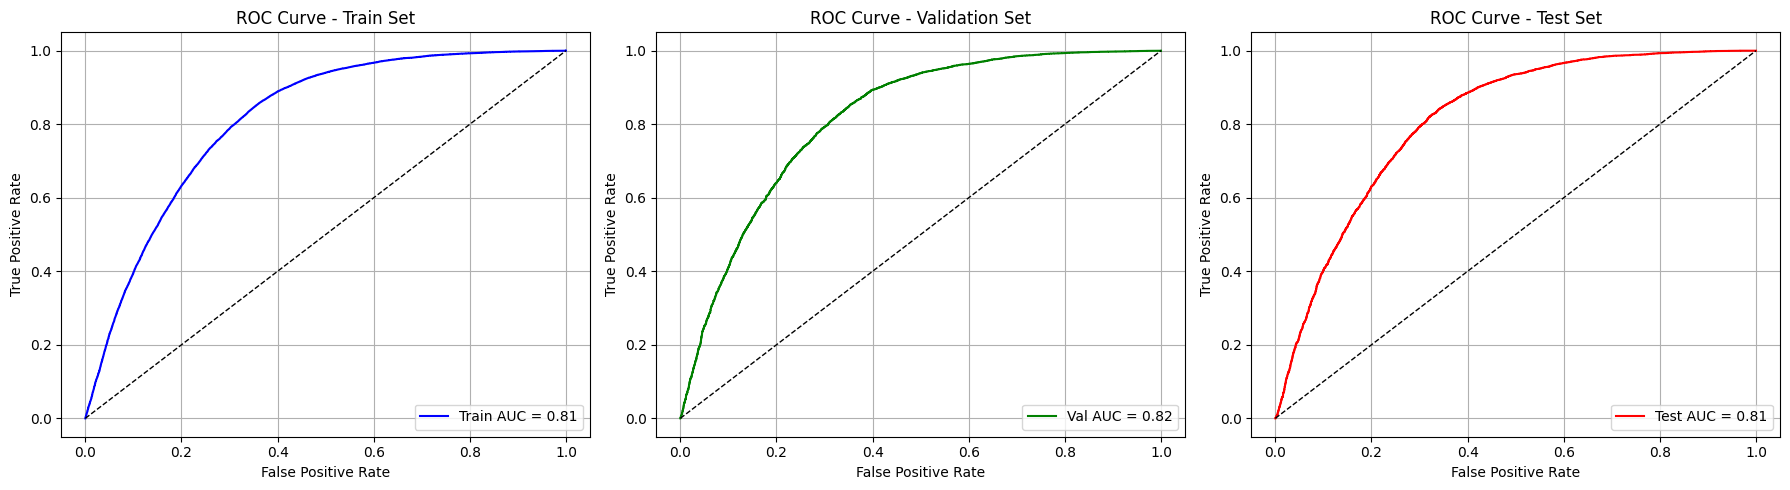

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Logistic regression model with 1000 iterations
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train, y_train)

# Do predictions and probabilities on train, validation, and test datasets
y_train_probs = logreg_model.predict_proba(X_train)[:, 1]
y_train_preds = logreg_model.predict(X_train)

y_val_probs = logreg_model.predict_proba(X_val)[:, 1]
y_val_preds = logreg_model.predict(X_val)

y_test_probs = logreg_model.predict_proba(X_test)[:, 1]
y_test_preds = logreg_model.predict(X_test)

# Calculate auc-roc score
auc_score1 = roc_auc_score(y_train, y_train_probs)
auc_score2 = roc_auc_score(y_val, y_val_probs)
auc_score3 = roc_auc_score(y_test, y_test_probs)

print(f"Training AUC-ROC Score: {auc_score1:.4f}")
print("Training Classification Report")
print(classification_report(y_train, y_train_preds, digits=6))

print(f"\nValidation AUC-ROC Score: {auc_score2:.4f}")
print("Validation Classification Report")
print(classification_report(y_val, y_val_preds, digits=6))

print(f"\nTesting AUC-ROC Score: {auc_score3:.4f}")
print("Testing Classification Report")
print(classification_report(y_test, y_test_preds, digits=6))

# Calculate false positive rate and true positive rate
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_probs)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)

# Graph 3 auc-roc curves for training, validation, and testing
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(fpr_train, tpr_train, color='blue', label=f'Train AUC = {auc_score1:.2f}')
axs[0].plot([0, 1], [0, 1], 'k--', lw=1)
axs[0].set_title('ROC Curve - Train Set')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc='lower right')
axs[0].grid(True)

axs[1].plot(fpr_val, tpr_val, color='green', label=f'Val AUC = {auc_score2:.2f}')
axs[1].plot([0, 1], [0, 1], 'k--', lw=1)
axs[1].set_title('ROC Curve - Validation Set')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')
axs[1].grid(True)

axs[2].plot(fpr_test, tpr_test, color='red', label=f'Test AUC = {auc_score3:.2f}')
axs[2].plot([0, 1], [0, 1], 'k--', lw=1)
axs[2].set_title('ROC Curve - Test Set')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc='lower right')
axs[2].grid(True)

plt.tight_layout()
plt.show()

Subset Test AUC-ROC Score: 0.7732
Subset Test Classification Report:
              precision    recall  f1-score   support

           0   0.729454  0.645531  0.684932      6971
           1   0.682064  0.760545  0.719170      6970

    accuracy                       0.703034     13941
   macro avg   0.705759  0.703038  0.702051     13941
weighted avg   0.705760  0.703034  0.702049     13941



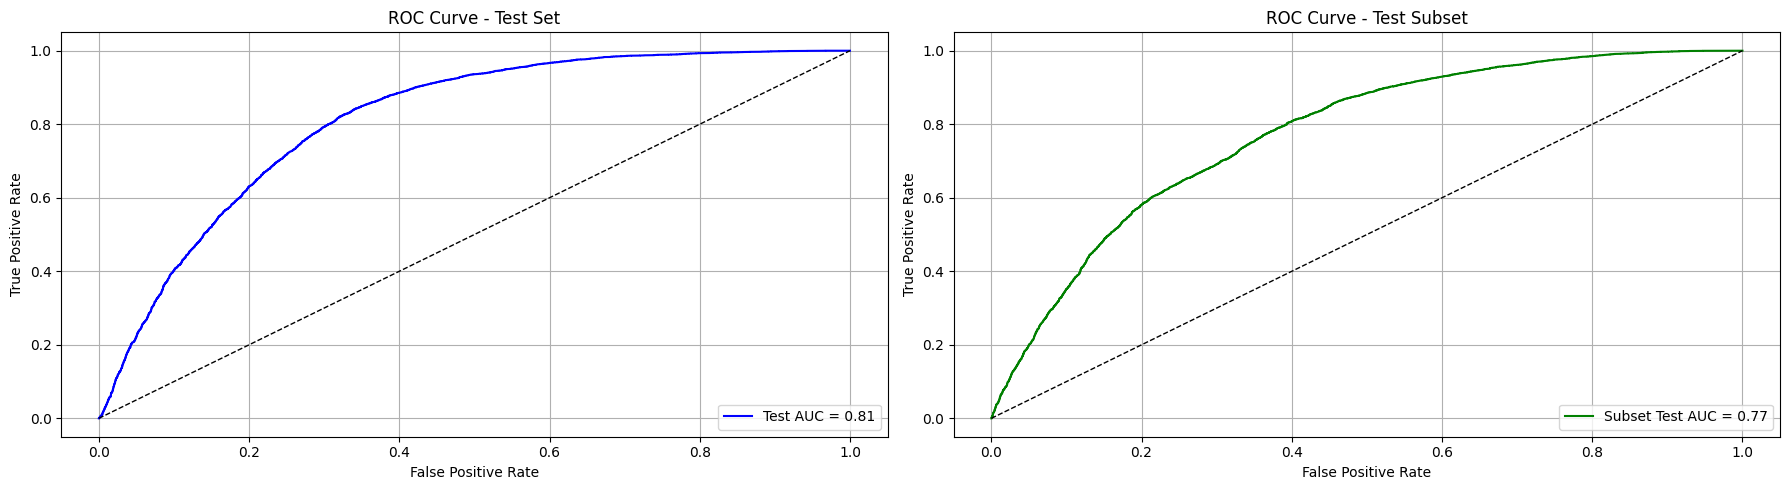

In [ ]:
# List of features to remove to simulate limited information
features_to_remove = [
    'grade', 'sub_grade'
]

# Drop features from original test dataset
X_test_subset = X_test.drop(columns=features_to_remove, errors='ignore')

# Make sure the columns are aligned in reduced test dataset
X_test_subset_aligned = X_test_subset.reindex(columns=X_train.columns, fill_value=0)

# Do predictions and probabilities on dataset
y_test_subset_probs = logreg_model.predict_proba(X_test_subset_aligned)[:, 1]
y_test_subset_preds = logreg_model.predict(X_test_subset_aligned)

# Calculate roc-auc score
auc_score4 = roc_auc_score(y_test, y_test_subset_probs)

print(f"Subset Test AUC-ROC Score: {auc_score4:.4f}")
print("Subset Test Classification Report:")
print(classification_report(y_test, y_test_subset_preds, digits=6))

# Calculate false positive rate and true positive rate
fpr_test_subset, tpr_test_subset, _ = roc_curve(y_test, y_test_subset_probs)
roc_auc_test_subset = auc(fpr_test_subset, tpr_test_subset)

# Graph test and test subset roc-auc curves
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].plot(fpr_test, tpr_test, color='blue', label=f'Test AUC = {auc_score3:.2f}')
axs[0].plot([0, 1], [0, 1], 'k--', lw=1)
axs[0].set_title('ROC Curve - Test Set')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc='lower right')
axs[0].grid(True)

axs[1].plot(fpr_test_subset, tpr_test_subset, color='green', label=f'Subset Test AUC = {auc_score4:.2f}')
axs[1].plot([0, 1], [0, 1], 'k--', lw=1)
axs[1].set_title('ROC Curve - Test Subset')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='lower right')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Now onto our Deep Learning model. To recap, we are going to use both deep learning and attention to learn feature importance and nonlinear patterns in tabular financial data and hopefully predict credit loan defaults.

** It has two Parallel Branches:**

#### 1. Attention Branch

* Applies multi-head attention to features
* Learns which features to focus on for each prediction
* Outputs weighted feature representations

#### 2. MLP Branch

* Stack of dense layers (e.g., 3–5 layers)
* Models non-linear interactions
* Uses ReLU activations + dropout for regularization


Then we combines outputs from Attention + MLP (e.g., via concatenation). The merged features are passed to final layers. The output (thanks to Sigmoid activation) will predict the probability of default. We will be computing loss with binary cross entropy and looking at metrics like AUC-ROC, precision, recall

1. Data Preparation

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # Shape (N, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


def prepare_data(df_resampled, batch_size=64):
    #  Separate features and target
    X = df_resampled.drop(columns=['default_ind'])
    y = df_resampled['default_ind']

    # Train/Val/Test split (70/15/15) with stratification. WE could have gone with 80/10/10 too.
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, stratify=y, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
    )

    # Standardize features (fit on train only)
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    X_test_subset_scaled = pd.DataFrame(scaler.transform(X_test_subset_aligned), columns=X.columns)

    # Wrap in PyTorch Dataset
    train_dataset = TabularDataset(X_train_scaled, y_train)
    val_dataset = TabularDataset(X_val_scaled, y_val)
    test_dataset = TabularDataset(X_test_scaled, y_test)
    test_subset_dataset = TabularDataset(X_test_subset_scaled, y_test)

    #  DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    test_subset_loader = DataLoader(test_subset_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader, test_subset_loader, X.columns.tolist()


We're going to build the model now

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AttentionBranch(nn.Module):
    def __init__(self, input_dim, embed_dim=32, num_heads=4, dropout=0.1):
        super(AttentionBranch, self).__init__()
        self.input_dim = input_dim      # Number of features
        self.embed_dim = embed_dim      # Embedding size per feature
        self.num_heads = num_heads

        # 1. Feature embedding layer: project each scalar feature to a vector
        # Input: (batch_size, input_dim) → Output: (batch_size, input_dim, embed_dim)
        self.feature_embedding = nn.Linear(1, embed_dim)

        # 2. Multi-head self-attention layer
        # PyTorch MultiheadAttention expects shape: (seq_len, batch, embed_dim)
        self.attention = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, dropout=dropout)

        # 3. Final projection after attention (optional)
        self.output_proj = nn.Linear(embed_dim, embed_dim)

        self.dropout = nn.Dropout(dropout)
        self.layernorm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        """
        x: Tensor of shape (batch_size, input_dim)
        """
        batch_size, input_dim = x.shape

        # Step 1: Embed each feature separately

        # Reshape to (batch_size * input_dim, 1) to embed each scalar feature
        x_reshaped = x.view(-1, 1)  # (batch_size*input_dim, 1)
        embedded = self.feature_embedding(x_reshaped)  # (batch_size*input_dim, embed_dim)
        embedded = embedded.view(batch_size, input_dim, self.embed_dim)  # (batch_size, input_dim, embed_dim)

        embedded = embedded.permute(1, 0, 2)  # (input_dim, batch_size, embed_dim)

        attn_output, attn_weights = self.attention(embedded, embedded, embedded)
        # attn_output shape: (input_dim, batch_size, embed_dim)

        attn_output = self.dropout(attn_output)
        out = self.layernorm(attn_output + embedded)  # (input_dim, batch_size, embed_dim)

        out = self.output_proj(out)  # (input_dim, batch_size, embed_dim)
        out = out.permute(1, 0, 2).contiguous()  # (batch_size, input_dim, embed_dim)
        out = out.view(batch_size, -1)  # flatten all features: (batch_size, input_dim * embed_dim)

        return out, attn_weights  # return output and attention weights for interpretability


# MLP branch: stack of fully connected layers with ReLU and dropout
class MLPBranch(nn.Module):
    def __init__(self, input_dim, hidden_dims=[64, 32, 16], dropout=0.1):
        super(MLPBranch, self).__init__()
        layers = []
        in_dim = input_dim

        for h_dim in hidden_dims:
            layers.append(nn.Linear(in_dim, h_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
            in_dim = h_dim

        self.mlp = nn.Sequential(*layers)

    def forward(self, x):
        return self.mlp(x)  # (batch_size, last_hidden_dim)

class HybridAttentionNet(nn.Module):
    def __init__(
        self,
        input_dim,
        embed_dim=32,
        num_heads=4,
        mlp_hidden_dims=[64, 32, 16],
        dropout=0.1,
    ):
        super(HybridAttentionNet, self).__init__()

        # Attention branch
        self.attention_branch = AttentionBranch(input_dim, embed_dim, num_heads, dropout)

        # MLP branch
        self.mlp_branch = MLPBranch(input_dim, mlp_hidden_dims, dropout)

        # Fusion layer: combine attention output and MLP output
        fusion_input_dim = input_dim * embed_dim + mlp_hidden_dims[-1]
        self.fusion_layer = nn.Sequential(
            nn.Linear(fusion_input_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(64, 1),  # final output = probability of default
            nn.Sigmoid(),
        )

    def forward(self, x):
        # Attention branch output (flattened)
        attn_out, attn_weights = self.attention_branch(x)  # (batch_size, input_dim * embed_dim)

        # MLP branch output
        mlp_out = self.mlp_branch(x)  # (batch_size, last_hidden_dim)

        # Concatenate features from both branches
        combined = torch.cat([attn_out, mlp_out], dim=1)  # (batch_size, fusion_input_dim)

        # Pass through fusion layers to get final probability
        output = self.fusion_layer(combined)  # (batch_size, 1)

        return output, attn_weights  # output


Now let's test our model

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import roc_auc_score, precision_score, recall_score

def train_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_targets = []

    for X_batch, y_batch in dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs, _ = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X_batch.size(0)
        all_preds.append(outputs.detach().cpu())
        all_targets.append(y_batch.detach().cpu())

    epoch_loss = running_loss / len(dataloader.dataset)
    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()
    all_preds_label = (all_preds >= 0.5).astype(int)

    epoch_auc = roc_auc_score(all_targets, all_preds)
    epoch_precision = precision_score(all_targets, all_preds_label)
    epoch_recall = recall_score(all_targets, all_preds_label)

    return epoch_loss, epoch_auc, epoch_precision, epoch_recall

def eval_epoch(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X_batch, y_batch in dataloader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs, _ = model(X_batch)
            loss = criterion(outputs, y_batch)

            running_loss += loss.item() * X_batch.size(0)
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch.cpu())

    epoch_loss = running_loss / len(dataloader.dataset)
    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()
    all_preds_label = (all_preds >= 0.5).astype(int)

    epoch_auc = roc_auc_score(all_targets, all_preds)
    epoch_precision = precision_score(all_targets, all_preds_label)
    epoch_recall = recall_score(all_targets, all_preds_label)

    return epoch_loss, epoch_auc, epoch_precision, epoch_recall

def train_model(
    model,
    train_loader,
    val_loader,
    n_epochs=20,
    lr=1e-3,
    device=None,
    save_path="best_model.pth"
):
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCELoss()
    history = {
        'train_loss': [],
        'train_auc': [],
        'val_loss': [],
        'val_auc': []
    }

    best_val_auc = 0.0

    for epoch in range(1, n_epochs + 1):
        train_loss, train_auc, train_prec, train_rec = train_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_auc, val_prec, val_rec = eval_epoch(model, val_loader, criterion, device)

        history['train_loss'].append(train_loss)
        history['train_auc'].append(train_auc)
        history['val_loss'].append(val_loss)
        history['val_auc'].append(val_auc)

        print(
            f"Epoch {epoch}/{n_epochs} | "
            f"Train Loss: {train_loss:.4f} | Train AUC: {train_auc:.4f} | Train Precision: {train_prec:.4f} | Train Recall: {train_rec:.4f} || "
            f"Val Loss: {val_loss:.4f} | Val AUC: {val_auc:.4f} | Val Precision: {val_prec:.4f} | Val Recall: {val_rec:.4f}"
        )

        # Save model if validation AUC improves
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            torch.save(model.state_dict(), save_path)
            print(f"--> Saved best model with Val AUC: {best_val_auc:.4f}")

    print("Training complete.")
    print(f"Best Val AUC: {best_val_auc:.4f}")

    # Load best model weights before returning
    model.load_state_dict(torch.load(save_path))
    return model, history



In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
import torch


def test_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs, _ = model(X_batch)
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch.cpu())

    all_preds = torch.cat(all_preds).numpy()
    all_targets = torch.cat(all_targets).numpy()
    all_preds_label = (all_preds >= 0.5).astype(int)

    auc = roc_auc_score(all_targets, all_preds)
    precision = precision_score(all_targets, all_preds_label)
    recall = recall_score(all_targets, all_preds_label)
    accuracy = accuracy_score(all_targets, all_preds_label)

    print(f"Test AUC: {auc:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Full Model:")
test_model(trained_model, test_loader, device)
print("Subset Model:")
test_model(trained_model, test_subset_loader, device)

Full Model:
Test AUC: 0.8217
Test Precision: 0.7158
Test Recall: 0.8443
Test Accuracy: 0.7545
Subset Model:
Test AUC: 0.8191
Test Precision: 0.7083
Test Recall: 0.8509
Test Accuracy: 0.7503


In [ ]:
# Step 1: Prepare data
train_loader, val_loader, test_loader, test_subset_loader, feature_names = prepare_data(df_resampled)

# Step 2: Initialize model
model = HybridAttentionNet(input_dim=len(feature_names))

# Step 3: Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 4: Train model
trained_model, history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    n_epochs=20,
    lr=1e-3,
    device=device,
    save_path="best_model.pth"
)

# Step 5: Test model
print("Testing on full test set:")
test_model(trained_model, test_loader, device)

print("Testing on subset test set:")
test_model(trained_model, test_subset_loader, device)


Using device: cpu
Epoch 1/20 | Train Loss: 0.5230 | Train AUC: 0.8109 | Train Precision: 0.7156 | Train Recall: 0.8113 || Val Loss: 0.5113 | Val AUC: 0.8248 | Val Precision: 0.7306 | Val Recall: 0.8082
--> Saved best model with Val AUC: 0.8248
Epoch 2/20 | Train Loss: 0.5152 | Train AUC: 0.8172 | Train Precision: 0.7177 | Train Recall: 0.8264 || Val Loss: 0.5089 | Val AUC: 0.8265 | Val Precision: 0.7112 | Val Recall: 0.8605
--> Saved best model with Val AUC: 0.8265
Epoch 3/20 | Train Loss: 0.5127 | Train AUC: 0.8192 | Train Precision: 0.7178 | Train Recall: 0.8288 || Val Loss: 0.5052 | Val AUC: 0.8266 | Val Precision: 0.7172 | Val Recall: 0.8455
--> Saved best model with Val AUC: 0.8266
Epoch 4/20 | Train Loss: 0.5103 | Train AUC: 0.8210 | Train Precision: 0.7189 | Train Recall: 0.8298 || Val Loss: 0.5055 | Val AUC: 0.8261 | Val Precision: 0.7137 | Val Recall: 0.8506
Epoch 5/20 | Train Loss: 0.5095 | Train AUC: 0.8218 | Train Precision: 0.7187 | Train Recall: 0.8326 || Val Loss: 0.5050

Quant results above. It exceeeds the baseline of AUC > 0.8 but we want to improve these metrics later.

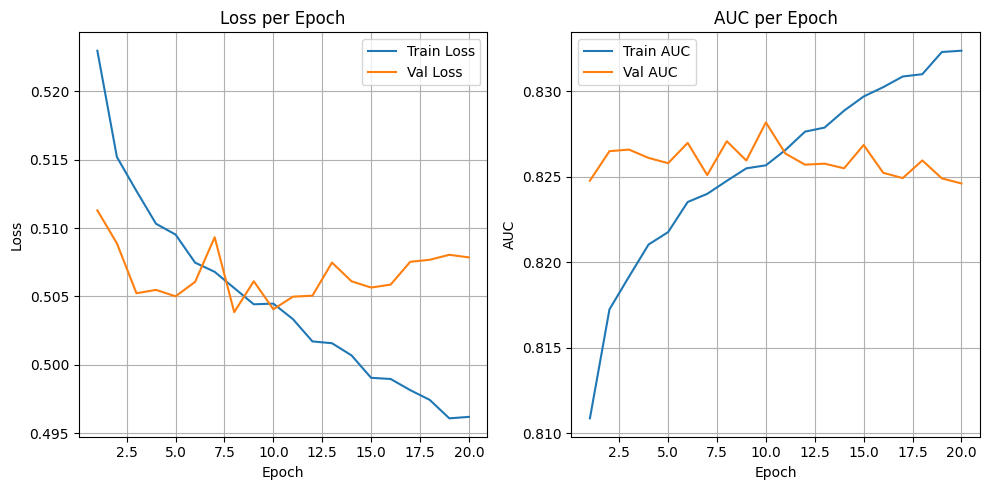

In [ ]:
def plot_loss_and_auc(history):
    epochs = range(1, len(history['train_loss']) + 1)
    plt.figure(figsize=(10, 5))

    # Loss subplot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()
    plt.grid(True)

    # AUC subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_auc'], label='Train AUC')
    plt.plot(epochs, history['val_auc'], label='Val AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.title('AUC per Epoch')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_loss_and_auc(history)

Training AUC-ROC Score: 0.8324
Training Classification Report:
              precision    recall  f1-score   support

         0.0   0.823035  0.662608  0.734160     32526
         1.0   0.717653  0.857534  0.781382     32527

    accuracy                       0.760073     65053
   macro avg   0.770344  0.760071  0.757771     65053
weighted avg   0.770343  0.760073  0.757771     65053


Validation AUC-ROC Score: 0.8282
Validation Classification Report:
              precision    recall  f1-score   support

         0.0   0.818811  0.661980  0.732090      6970
         1.0   0.716315  0.853515  0.778920      6970

    accuracy                       0.757747     13940
   macro avg   0.767563  0.757747  0.755505     13940
weighted avg   0.767563  0.757747  0.755505     13940


Testing AUC-ROC Score: 0.8201
Testing Classification Report:
              precision    recall  f1-score   support

         0.0   0.813265  0.657868  0.727359      6971
         1.0   0.712720  0.848924  0.774882 

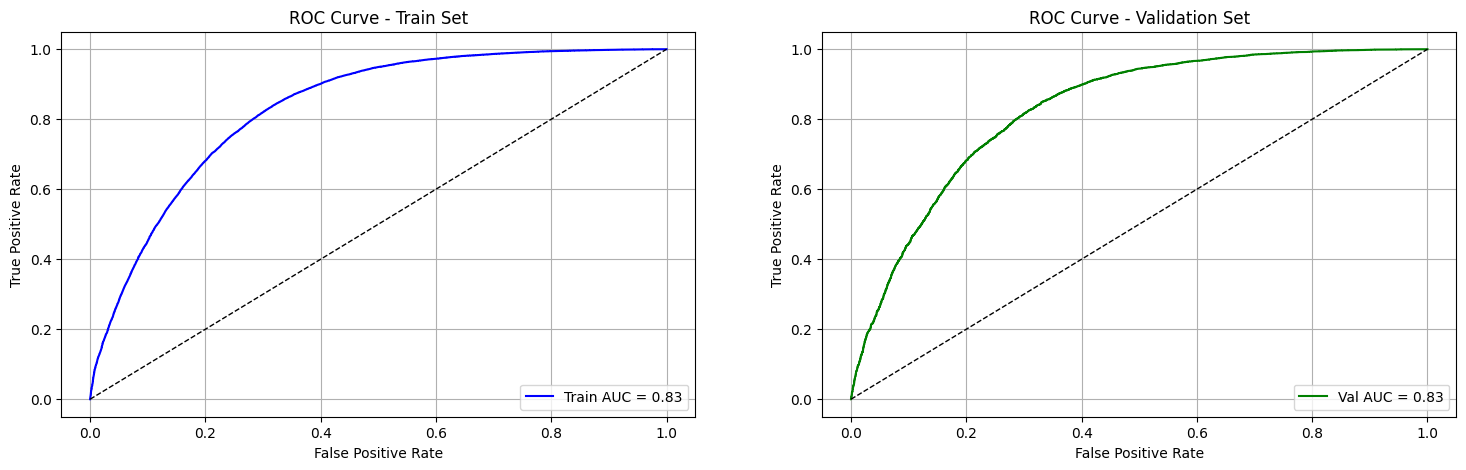

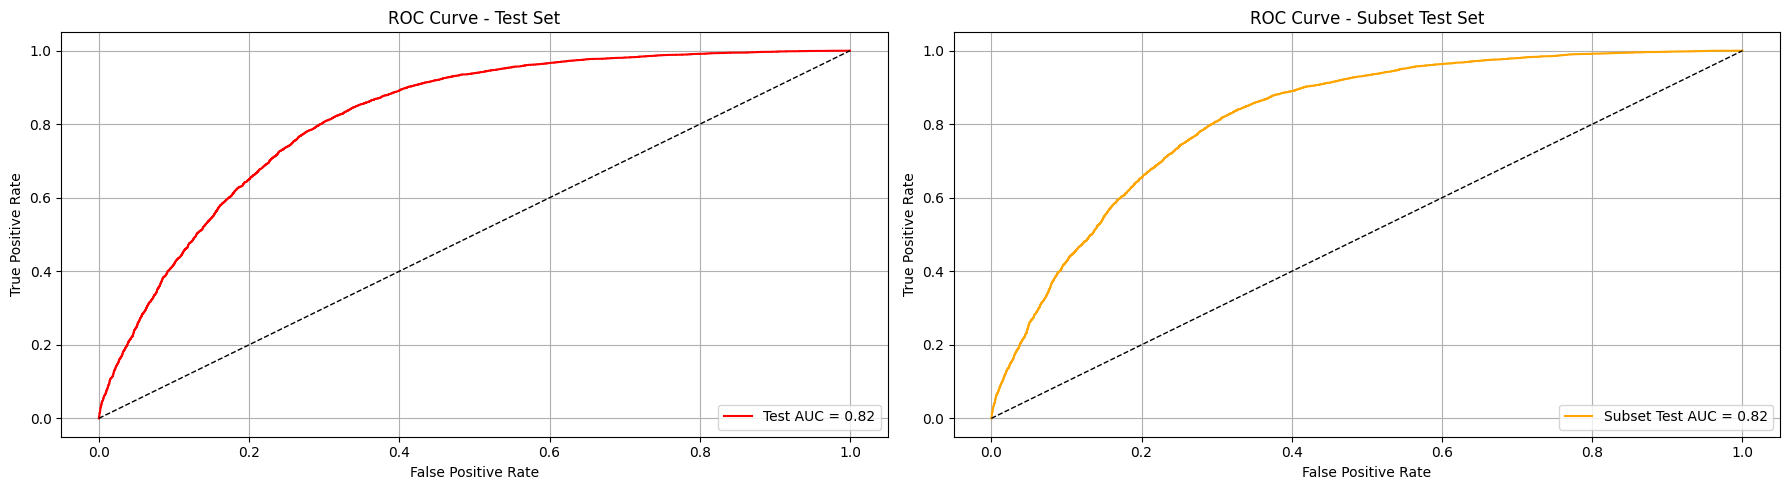

In [ ]:
def get_preds_probs_labels(model, dataloader, device):
    model.eval()
    all_probs, all_targets = [], []
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            outputs, _ = model(X)
            all_probs.append(outputs.cpu())
            all_targets.append(y)
    probs = torch.cat(all_probs).numpy().flatten()
    targets = torch.cat(all_targets).numpy().flatten()
    preds = (probs >= 0.5).astype(int)
    return targets, probs, preds

def print_metrics_and_plot_roc(model, train_loader, val_loader, test_loader, device):
    y_train, y_train_probs, y_train_preds = get_preds_probs_labels(model, train_loader, device)
    y_val, y_val_probs, y_val_preds = get_preds_probs_labels(model, val_loader, device)
    y_test, y_test_probs, y_test_preds = get_preds_probs_labels(model, test_loader, device)
    y_test_subset, y_test_subset_probs, y_test_subset_preds = get_preds_probs_labels(model, test_subset_loader, device)

    # Print metrics
    for name, y_true, y_prob, y_pred in [
        ("Training", y_train, y_train_probs, y_train_preds),
        ("Validation", y_val, y_val_probs, y_val_preds),
        ("Testing", y_test, y_test_probs, y_test_preds),
        ("Subset Testing", y_test_subset, y_test_subset_probs, y_test_subset_preds)
    ]:
        auc_score = roc_auc_score(y_true, y_prob)
        print(f"{name} AUC-ROC Score: {auc_score:.4f}")
        print(f"{name} Classification Report:")
        print(classification_report(y_true, y_pred, digits=6))
        print()

    # Compute ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_probs)
    fpr_val, tpr_val, _ = roc_curve(y_val, y_val_probs)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_probs)
    fpr_test_subset, tpr_test_subset, _ = roc_curve(y_test_subset, y_test_subset_probs)

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(18, 5))

    axs[0].plot(fpr_train, tpr_train, color='blue', label=f'Train AUC = {roc_auc_score(y_train, y_train_probs):.2f}')
    axs[0].plot([0, 1], [0, 1], 'k--', lw=1)
    axs[0].set_title('ROC Curve - Train Set')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    axs[1].plot(fpr_val, tpr_val, color='green', label=f'Val AUC = {roc_auc_score(y_val, y_val_probs):.2f}')
    axs[1].plot([0, 1], [0, 1], 'k--', lw=1)
    axs[1].set_title('ROC Curve - Validation Set')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].legend(loc='lower right')
    axs[1].grid(True)

    fig, axs = plt.subplots(1, 2, figsize=(18, 5))

    axs[0].plot(fpr_test, tpr_test, color='red', label=f'Test AUC = {roc_auc_score(y_test, y_test_probs):.2f}')
    axs[0].plot([0, 1], [0, 1], 'k--', lw=1)
    axs[0].set_title('ROC Curve - Test Set')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].legend(loc='lower right')
    axs[0].grid(True)

    axs[1].plot(fpr_test_subset, tpr_test_subset, color='orange', label=f'Subset Test AUC = {roc_auc_score(y_test_subset, y_test_subset_probs):.2f}')
    axs[1].plot([0, 1], [0, 1], 'k--', lw=1)
    axs[1].set_title('ROC Curve - Subset Test Set')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].legend(loc='lower right')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

print_metrics_and_plot_roc(trained_model, train_loader, val_loader, test_loader, device)

Now let's look at which features get the most attention

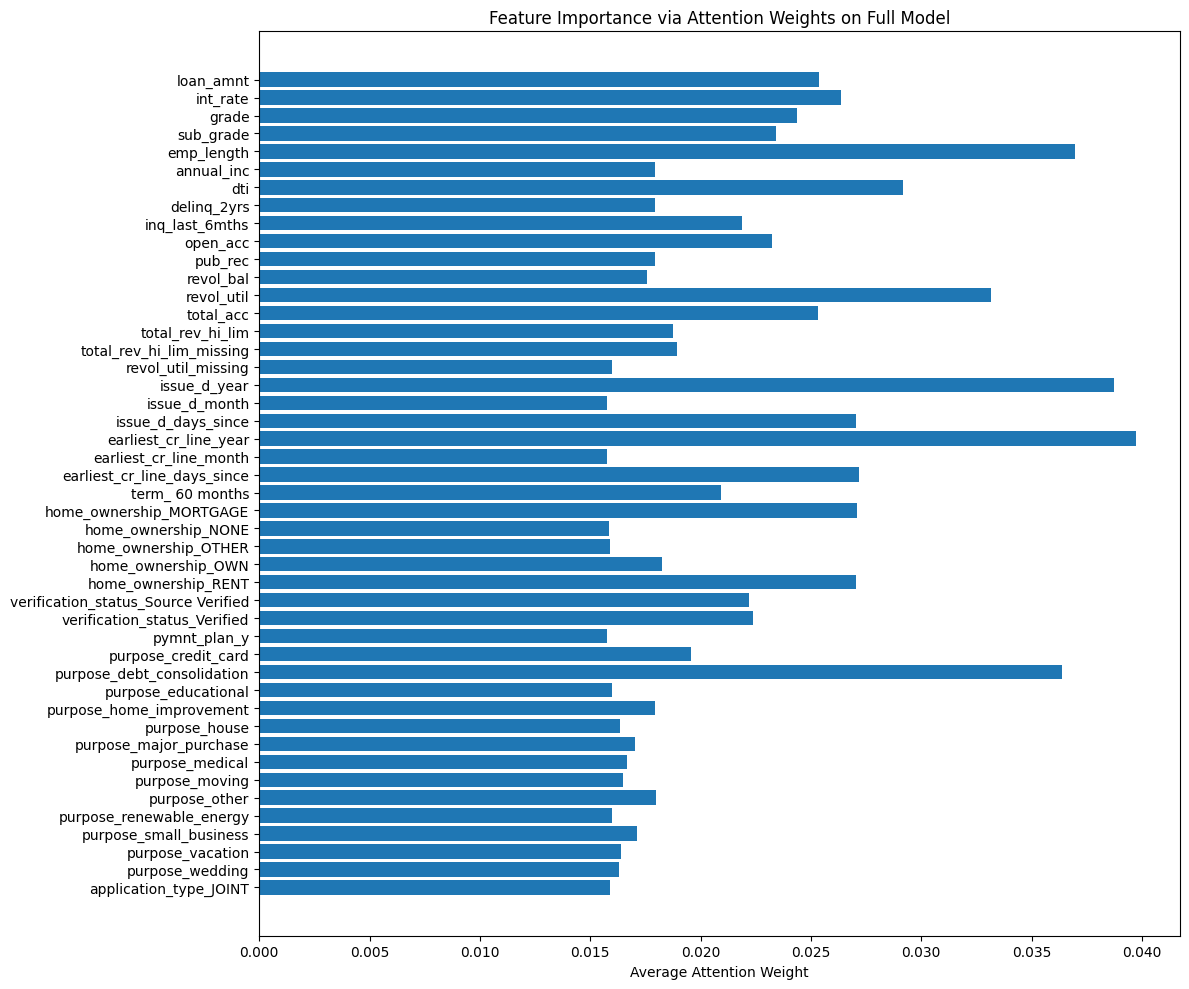

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def get_average_attention_weights(model, dataloader, device, feature_names):
    model.eval()
    total_attn_weights = []

    with torch.no_grad():
        for X_batch, _ in dataloader:
            X_batch = X_batch.to(device)
            _, attn_weights = model(X_batch)  # (batch_size, num_features, num_features)
            attn_weights = attn_weights.mean(dim=1)  # mean over all heads: (batch_size, num_features)
            total_attn_weights.append(attn_weights.cpu())

    # Stack and average over all batches
    all_weights = torch.cat(total_attn_weights, dim=0).numpy()  # (num_samples, num_features)
    avg_weights = np.mean(all_weights, axis=0)  # (num_features,)

    return avg_weights

# Compute average attention
avg_attn_weights = get_average_attention_weights(trained_model, test_loader, device, feature_names)

#  Plot
plt.figure(figsize=(12, 10))
plt.barh(feature_names, avg_attn_weights)
plt.xlabel("Average Attention Weight")
plt.title("Feature Importance via Attention Weights on Full Model")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

It looks like the features that got the most attention were earliest_cr_line_year, issued_year and emp_length.